In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# print(df.columns)
# print(df.head())
# print("Stage I patient count:", df_rsf["Stage_I"].sum())
# print("Stage II patient count:", df_rsf["Stage_II"].sum())
# print("Stage III patient count:", df_rsf["Stage_III"].sum())
# print("Stage IV patient count:", df_rsf["Stage_IV"].sum())

# print(df["Stage"].value_counts(dropna=False))

Running improved survival analysis with combined Stage IV...

----- Stage Grouping Counts -----
Stage_Group
IV-Combined    1904
III             605
II              400
I               352
0                44
X                 6
IIIC              2
IIIA              2
IIA               2
IB                1
IIB               1
Name: count, dtype: int64

----- Main Stage Counts -----
Main_Stage
IV     1904
III     609
II      403
I       353
0        44
X         6
Name: count, dtype: int64


C:\Users\Daniel Esguerra\AppData\Local\Temp\ipykernel_15048\1447215815.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Status"] = df["Status"].replace({"Dead": 1, "Alive": 0})


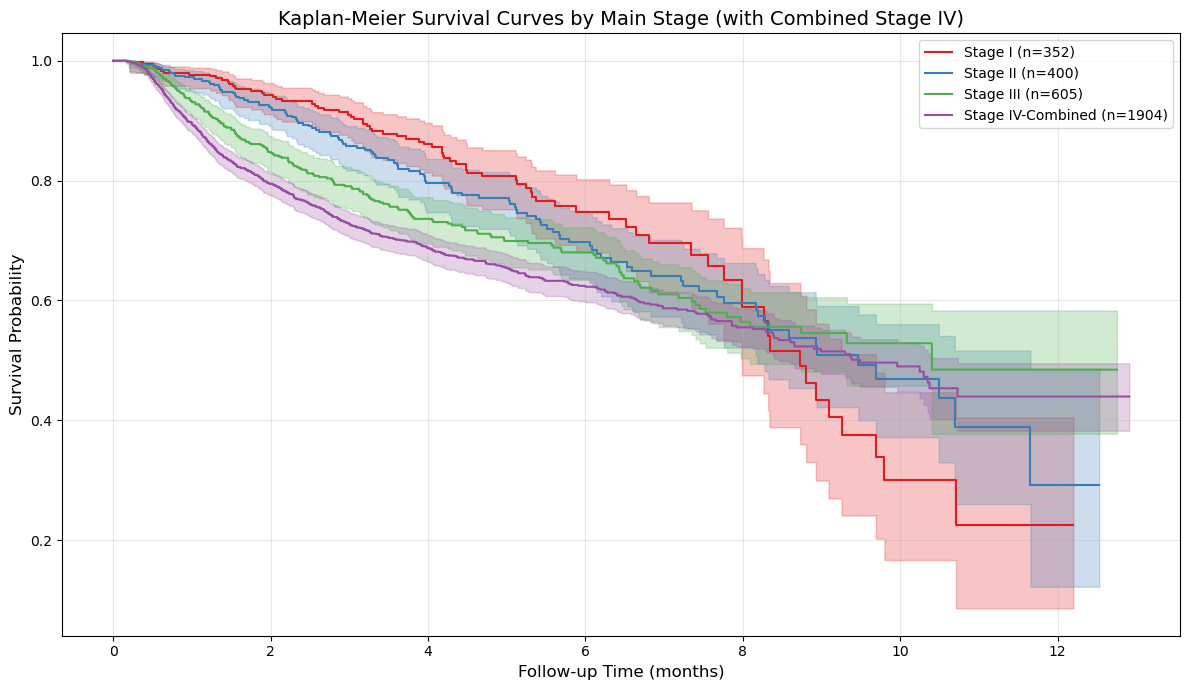


----- Pairwise Log-rank Tests for Main Stages -----
Stage I vs Stage II: p-value = 0.5566
Stage I vs Stage III: p-value = 0.0319
Stage I vs Stage IV-Combined: p-value = 0.0000
Stage II vs Stage III: p-value = 0.2008
Stage II vs Stage IV-Combined: p-value = 0.0013
Stage III vs Stage IV-Combined: p-value = 0.0273


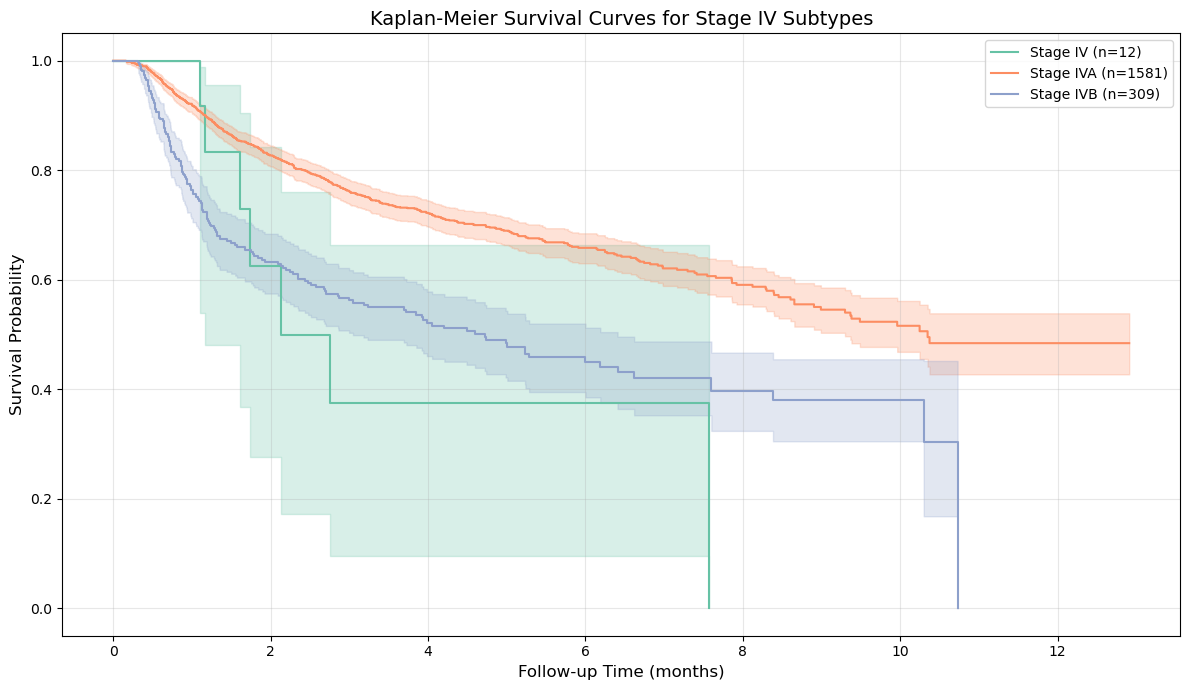


----- Stage Grouping Counts -----
Stage_Group
IV-Combined    1904
III             605
II              400
I               352
0                44
X                 6
IIIC              2
IIIA              2
IIA               2
IB                1
IIB               1
Name: count, dtype: int64

----- Main Stage Counts -----
Main_Stage
IV     1904
III     609
II      403
I       353
0        44
X         6
Name: count, dtype: int64


<lifelines.CoxPHFitter: fitted with 3319 total observations, 2269 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 3319
number of events observed = 1050
   partial log-likelihood = -7659.20
         time fit was run = 2025-03-14 11:03:25 UTC

---
                            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                   
Age                         0.05      1.05      0.00            0.05            0.06                1.05                1.06
Sex_Male                   -0.03      0.97      0.08           -0.19            0.12                0.83                1.13
Stage_Group_I              -0.27      0.76      0.34           -0.93            0.39                0.39                1.47
Stage_Group_IB            -17.01      0.00  24947.34       -48912.90        48878.87                0.00                 inf
Stage_Group_II             -0.07      0.93      0.33           -0.72            0.58                0.49                1.79
Stage_Group_IIA           -11.83      0.00    588.67        -1165.60         1141.94                0.00                 inf
Stage_Group_IIB             2.51     12.30      1.05            0.44            4.57                1.56               96.99
Stage_Group_III             0.23      1.26      0.33           -0.41            0.87                0.66                2.38
Stage_Group_IIIA            3.05     21.07      0.78            1.52            4.58                4.55               97.51
Stage_Group_IIIC            2.72     15.24      0.78            1.20            4.25                3.33               69.77
Stage_Group_IV-Combined     0.60      1.83      0.32           -0.02            1.23                0.98                3.41
Stage_Group_X               1.74      5.68      0.59            0.58            2.90                1.78               18.17
Smoking Status_Ex-smoker   -0.53      0.59      0.07           -0.67           -0.40                0.51                0.67
Smoking Status_Non-smoker  -1.02      0.36      0.09           -1.20           -0.84                0.30                0.43
Smoking Status_unknown     -0.35      0.71      0.32           -0.98            0.29                0.38                1.33

                           cmp to      z      p  -log2(p)
covariate                                                
Age                          0.00  16.55 <0.005    202.03
Sex_Male                     0.00  -0.40   0.69      0.54
Stage_Group_I                0.00  -0.81   0.42      1.26
Stage_Group_IB               0.00  -0.00   1.00      0.00
Stage_Group_II               0.00  -0.21   0.84      0.26
Stage_Group_IIA              0.00  -0.02   0.98      0.02
Stage_Group_IIB              0.00   2.38   0.02      5.86
Stage_Group_III              0.00   0.70   0.48      1.05
Stage_Group_IIIA             0.00   3.90 <0.005     13.34
Stage_Group_IIIC             0.00   3.51 <0.005     11.12
Stage_Group_IV-Combined      0.00   1.89   0.06      4.08
Stage_Group_X                0.00   2.93 <0.005      8.21
Smoking Status_Ex-smoker     0.00  -7.73 <0.005     46.43
Smoking Status_Non-smoker    0.00 -11.01 <0.005     91.31
Smoking Status_unknown       0.00  -1.08   0.28      1.82
---
Concordance = 0.69
Partial AIC = 15348.40
log-likelihood ratio test = 485.15 on 15 df
-log2(p) of ll-ratio test = 309.30

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 3319 total observations, 2269 right-censored observations>
         test_name = proportional_hazard_test

---
                                test_statistic    p  -log2(p)
Age                       km              6.57 0.01      6.59
                          rank            4.99 0.03      5.29
Sex_Male                  km              2.12 0.15      2.78
                          rank            2.57 0.11      3.20
Smoking Status_Ex-smoker  km              0.35 0.56      0.85
                          rank            0.16 0.69      0.54
Smoking Status_Non-smoker km              0.16 0.69      0.54
                          rank            0.01 0.94      0.09
Smoking Status_unknown    km              0.01 0.93      0.10
                          rank            0.01 0.91      0.14
Stage_Group_I             km              0.95 0.33      1.60
                          rank            0.26 0.61      0.71
Stage_Group_IB            km              0.00 1.00      0.00
                          rank            0.00 1.00      0.00
Stage_Group_II            km              0.19 0.66      0.60
                          rank            0.01 0.92      0.12
Stage_Group_IIA           km              0.00 1.00      0.00
                          rank            0.00 1.00      0.00
Stage_Group_IIB           km              0.00 0.99      0.02
                          rank            0.00 0.99      0.02
Stage_Group_III           km              0.57 0.45      1.15
                          rank            1.07 0.30      1.74
Stage_Group_IIIA          km              0.00 0.95      0.07
                          rank            0.01 0.93      0.11
Stage_Group_IIIC          km              0.00 0.99      0.01
                          rank            0.00 0.96      0.06
Stage_Group_IV-Combined   km              1.85 0.17      2.52
                          rank            2.92 0.09      3.51
Stage_Group_X             km              1.28 0.26      1.96
                          rank            1.66 0.20      2.34



1. Variable 'Age' failed the non-proportional test: p-value is 0.0104.

   Advice 1: the functional form of the variable 'Age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Age' using pd.cut, and then specify it in `strata=['Age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varyi

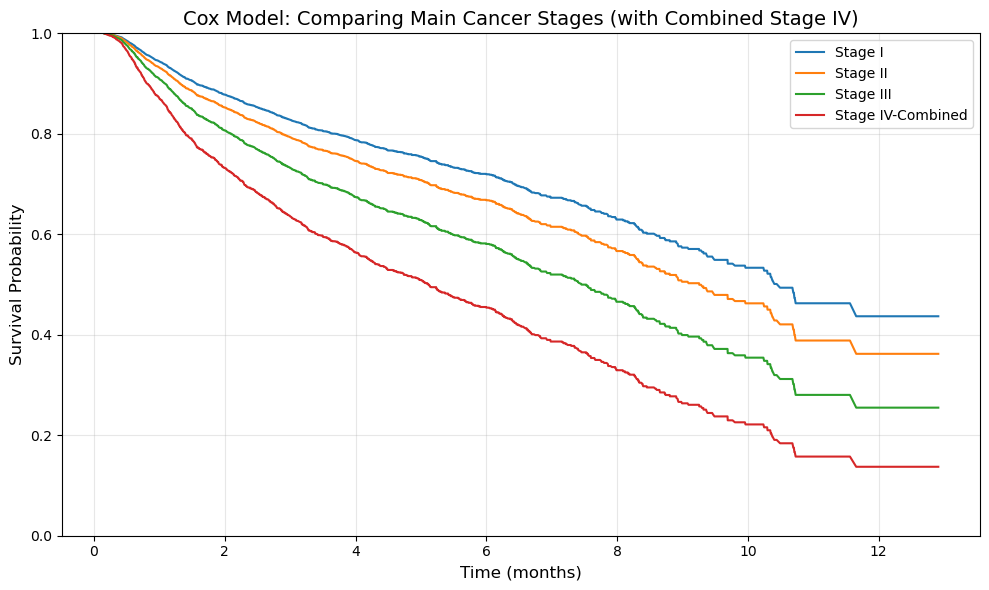

Smoking status columns: ['Smoking Status_Ex-smoker', 'Smoking Status_Non-smoker', 'Smoking Status_unknown']


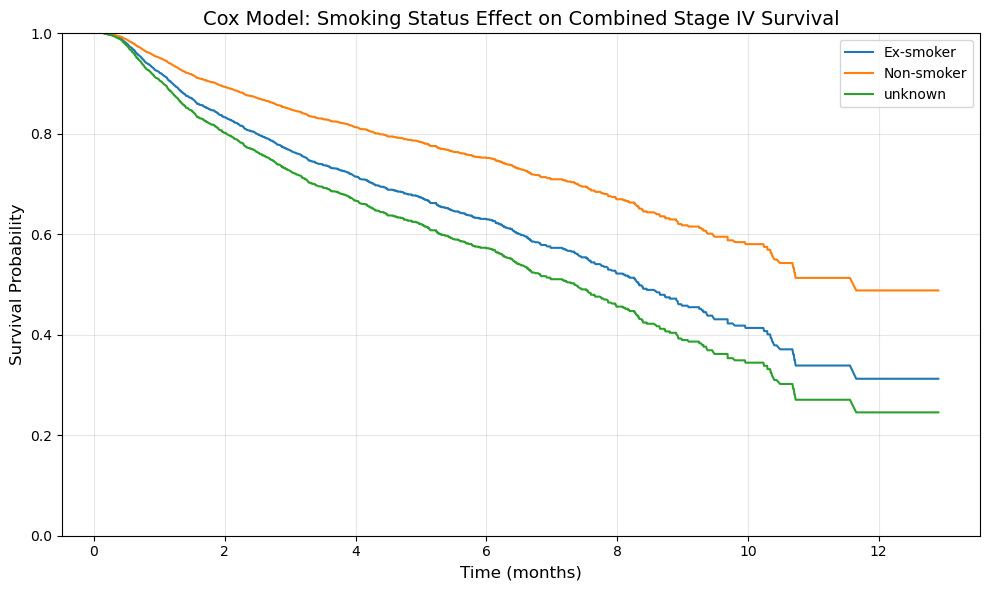


----- Stage Grouping Counts -----
Stage_Group
IV-Combined    1904
III             605
II              400
I               352
0                44
X                 6
IIIC              2
IIIA              2
IIA               2
IB                1
IIB               1
Name: count, dtype: int64

----- Main Stage Counts -----
Main_Stage
IV     1904
III     609
II      403
I       353
0        44
X         6
Name: count, dtype: int64
RSF model concordance index: 0.7279390427204879
Permutation Importances:
                      feature  importance
0                         Age    0.143130
13  Smoking Status_Non-smoker    0.065749
12   Smoking Status_Ex-smoker    0.038559
10    Stage_Group_IV-Combined    0.038460
2               Stage_Group_I    0.011910
1                    Sex_Male    0.008672
7             Stage_Group_III    0.006044
4              Stage_Group_II    0.005854
14     Smoking Status_unknown    0.000082
3              Stage_Group_IB    0.000000
5             Stage_Group_IIA   

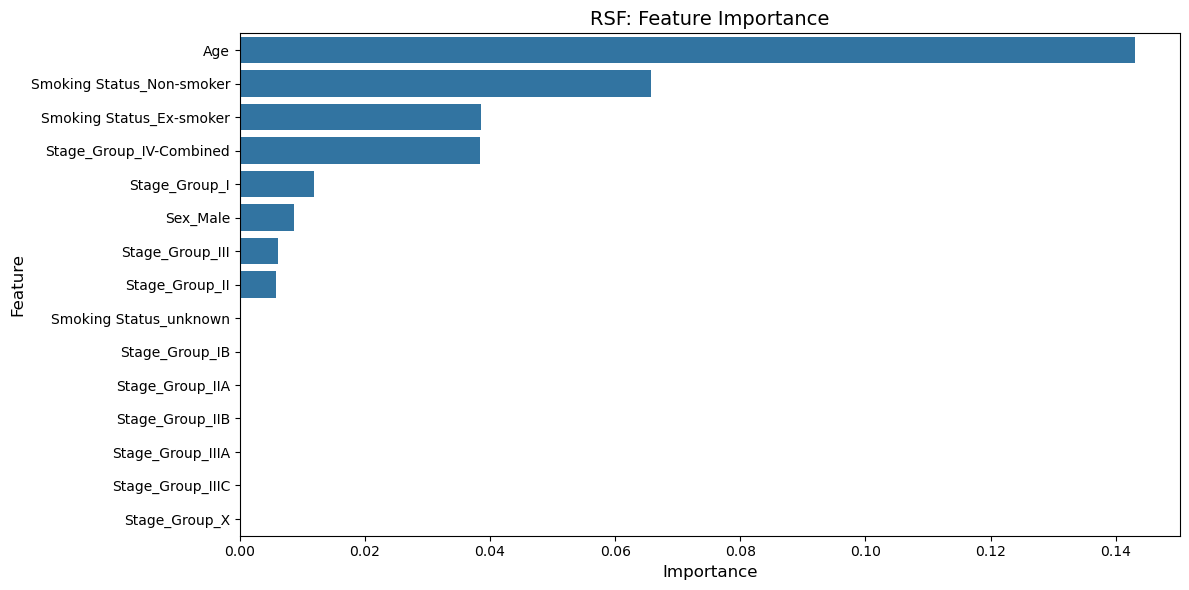

Main stage columns identified for RSF: ['Stage_Group_I', 'Stage_Group_II', 'Stage_Group_III', 'Stage_Group_IV-Combined']


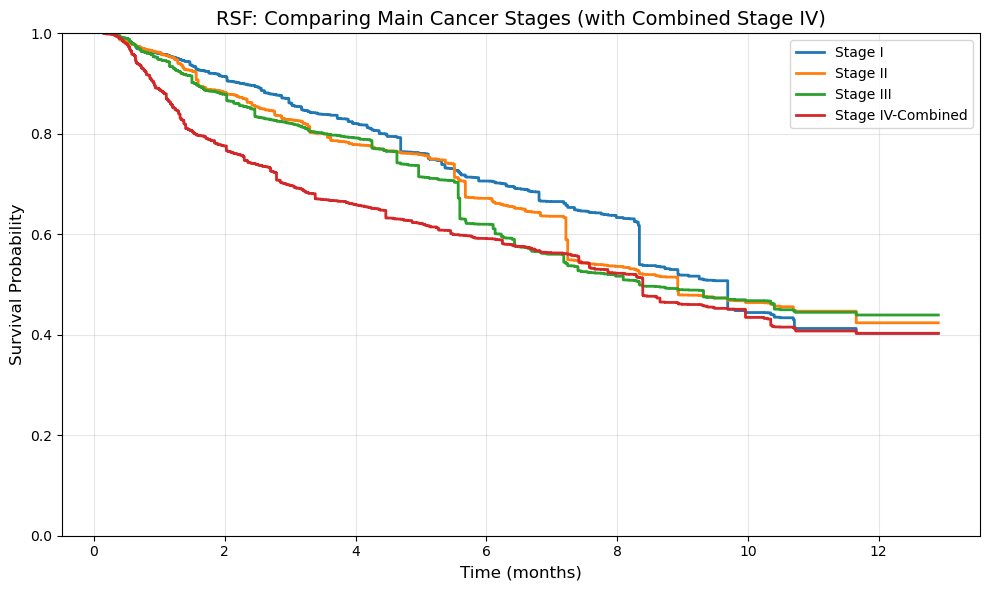

Stage_IV: 12 samples
Stage_IVA: 1581 samples
Stage_IVB: 309 samples


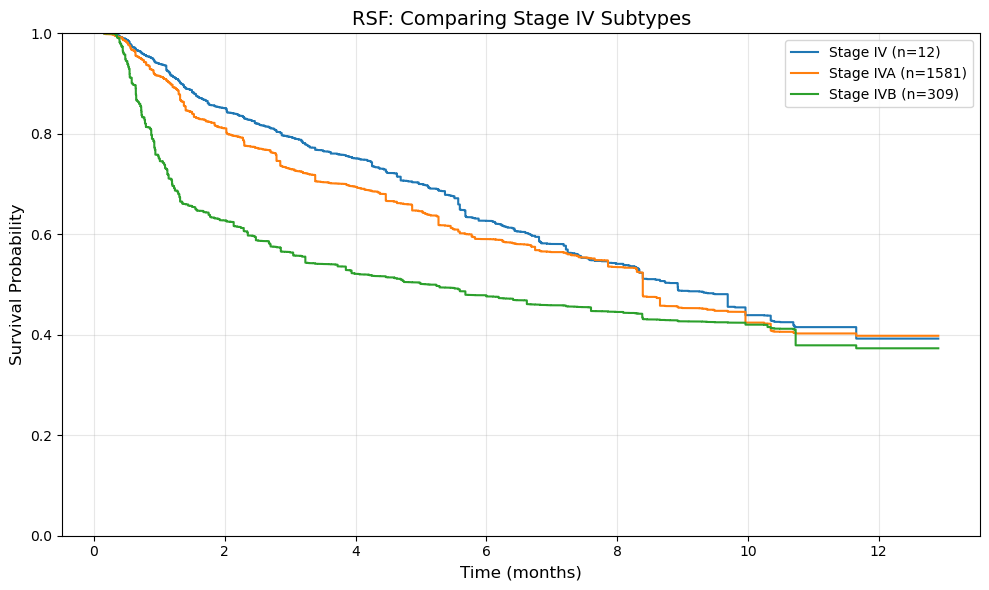

Smoking status columns: ['Smoking Status_Ex-smoker', 'Smoking Status_Non-smoker', 'Smoking Status_unknown']


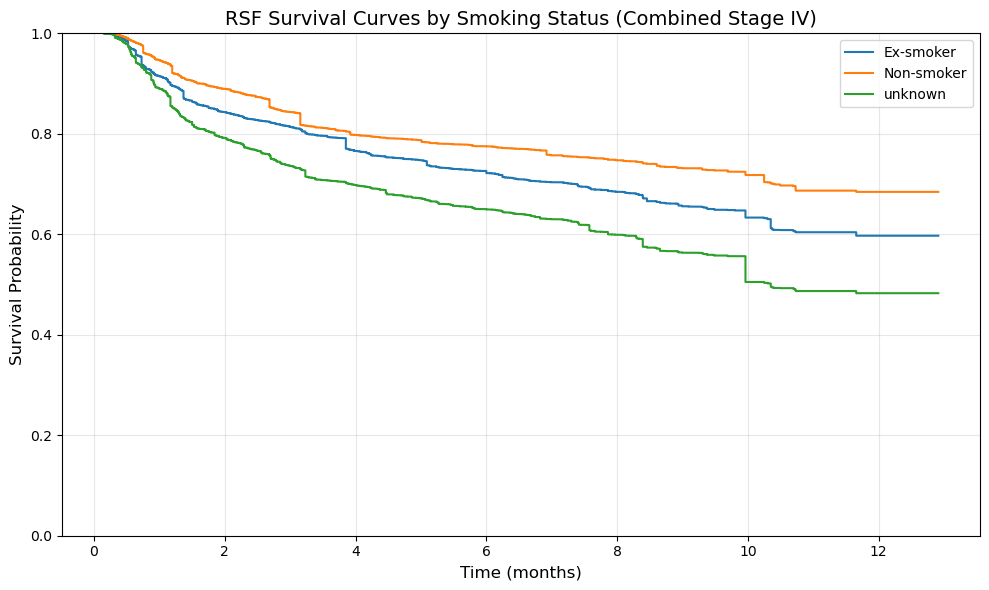

Improved analysis complete!


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.lines import Line2D
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sklearn.inspection import permutation_importance

# ---------------------------
# 1. Data Loading and Preprocessing
# ---------------------------
data_path = "../Data/RADCURE_Clinical_v04_20241219.csv"
df = pd.read_csv(data_path, low_memory=False)

# Ensure survival time is numeric
df["Length FU"] = pd.to_numeric(df["Length FU"], errors="coerce")

# Convert "Dead" -> 1, "Alive" -> 0 in Status (adjust if needed)
df["Status"] = df["Status"].replace({"Dead": 1, "Alive": 0})
df["Status"] = pd.to_numeric(df["Status"], errors="coerce")

# ---------------------------
# 2. Stage Distribution Analysis
# ---------------------------
def analyze_stage_distribution(df):
    print("\n----- Stage Distribution -----")
    stage_counts = df["Stage"].value_counts().sort_index()
    print(stage_counts)
    
    plt.figure(figsize=(14, 8))
    
    # Use a color palette that distinguishes main stages from substages
    colors = []
    for stage in stage_counts.index:
        if pd.isna(stage):
            colors.append('lightgray')  # NaN values
        elif stage in ['I', 'II', 'III', 'IV']:
            colors.append('royalblue')  # Main stages
        elif stage == '0':
            colors.append('lightgreen')  # Stage 0
        elif stage == 'X':
            colors.append('purple')  # Stage X
        else:
            colors.append('coral')  # Substages
    
    # Create bar chart with custom colors
    bars = plt.bar(stage_counts.index.astype(str), stage_counts.values, color=colors)
    plt.title("Distribution of Cancer Stages in Dataset", fontsize=16)
    plt.xlabel("Stage", fontsize=14)
    plt.ylabel("Number of Patients", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    
    # Add a legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='royalblue', markersize=10, label='Main Stages'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='coral', markersize=10, label='Substages'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=10, label='Stage 0'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Stage X'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgray', markersize=10, label='Missing (NaN)')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    # Add count labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{height}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Print main stage counts for reference
    main_stages = ['I', 'II', 'III', 'IV']
    for stage in main_stages:
        if stage in stage_counts:
            print(f"Stage {stage} patient count: {stage_counts[stage]}")
# ---------------------------
# Function to Create Combined Stage IV Group and Improve Staging Analysis
# ---------------------------
def create_combined_stage_groups(df):
    """
    Create a new DataFrame with a combined Stage IV group and improved stage grouping
    """
    # Create a copy of the dataframe
    df_modified = df.copy()
    
    # Create a new column 'Stage_Group' for analysis
    df_modified['Stage_Group'] = df_modified['Stage']
    
    # Create a 'Combined Stage IV' group that includes all Stage IV and substages
    df_modified['Stage_Group'] = df_modified['Stage_Group'].apply(
        lambda x: 'IV-Combined' if str(x).startswith('IV') else x
    )
    
    # Create a sample size column
    stage_counts = df_modified['Stage'].value_counts()
    df_modified['Stage_Count'] = df_modified['Stage'].map(stage_counts)
    
    # Also keep a column 'Main_Stage' that extracts just the main stage (I, II, III, IV)
    def extract_main_stage(stage_str):
        if pd.isna(stage_str):
            return np.nan
        stage_str = str(stage_str)
        if stage_str in ['I', 'II', 'III', 'IV']:
            return stage_str
        elif stage_str.startswith('IV'):
            return 'IV'
        elif stage_str.startswith('III'):
            return 'III'
        elif stage_str.startswith('II'):
            return 'II'
        elif stage_str.startswith('I'):
            return 'I'
        return stage_str
    
    df_modified['Main_Stage'] = df_modified['Stage'].apply(extract_main_stage)
    
    # Print the counts of each group
    print("\n----- Stage Grouping Counts -----")
    print(df_modified['Stage_Group'].value_counts())
    print("\n----- Main Stage Counts -----")
    print(df_modified['Main_Stage'].value_counts())
    
    return df_modified

# ---------------------------
# Improved KM Analysis for Main Stages (including Combined Stage IV)
# ---------------------------
def km_improved_stage_analysis(df):
    # Create the modified dataframe with combined stages
    df_modified = create_combined_stage_groups(df)
    
    # Create a figure for the main stage analysis
    plt.figure(figsize=(12, 7))
    
    # Focus on main stages and combined Stage IV
    main_stages = ['I', 'II', 'III', 'IV-Combined']
    
    # Initialize Kaplan-Meier fitter
    kmf = KaplanMeierFitter()
    
    # Use a consistent color palette
    colors = sns.color_palette("Set1", len(main_stages))
    
    # Plot survival curve for each main stage group
    for i, stage in enumerate(main_stages):
        if stage == 'IV-Combined':
            # For the combined Stage IV group, use the Stage_Group column
            mask = df_modified["Stage_Group"] == stage
        else:
            # For other main stages, use the original Stage column
            mask = df_modified["Stage"] == stage
            
        if mask.sum() > 0:  # Only plot if there are patients with this stage
            T = df_modified.loc[mask, "Length FU"]
            E = df_modified.loc[mask, "Status"]
            
            # Skip if no valid data
            if len(T) == 0 or T.isna().all():
                continue
                
            # Fit and plot KM curve with sample size in label
            kmf.fit(T, event_observed=E, label=f"Stage {stage} (n={len(T)})")
            kmf.plot(ci_show=True, color=colors[i % len(colors)])
    
    plt.title("Kaplan-Meier Survival Curves by Main Stage (with Combined Stage IV)", fontsize=14)
    plt.xlabel("Follow-up Time (months)", fontsize=12)
    plt.ylabel("Survival Probability", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Perform pairwise log-rank tests
    print("\n----- Pairwise Log-rank Tests for Main Stages -----")
    
    for i, stage1 in enumerate(main_stages[:-1]):
        for stage2 in main_stages[i+1:]:
            if stage1 == 'IV-Combined':
                mask1 = df_modified["Stage_Group"] == stage1
            else:
                mask1 = df_modified["Stage"] == stage1
                
            if stage2 == 'IV-Combined':
                mask2 = df_modified["Stage_Group"] == stage2
            else:
                mask2 = df_modified["Stage"] == stage2
            
            T1 = df_modified.loc[mask1, "Length FU"]
            E1 = df_modified.loc[mask1, "Status"]
            T2 = df_modified.loc[mask2, "Length FU"]
            E2 = df_modified.loc[mask2, "Status"]
            
            # Skip if either group has no valid data
            if len(T1) == 0 or len(T2) == 0 or T1.isna().all() or T2.isna().all():
                continue
                
            results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
            print(f"Stage {stage1} vs Stage {stage2}: p-value = {results.p_value:.4f}")
    
    # Special analysis for Stage IV subtypes
    plt.figure(figsize=(12, 7))
    
    # Get Stage IV and its subtypes
    stage_iv_types = [s for s in df_modified["Stage"].unique() if str(s).startswith('IV')]
    
    # Add sample counts
    stage_iv_counts = {s: (df_modified["Stage"] == s).sum() for s in stage_iv_types}
    stage_iv_types = [s for s in stage_iv_types if stage_iv_counts[s] >= 5]  # Only include stages with at least 5 samples
    
    # Use a consistent color palette
    colors = sns.color_palette("Set2", len(stage_iv_types))
    
    # Plot survival curve for each Stage IV type
    for i, stage in enumerate(sorted(stage_iv_types, key=lambda x: str(x))):
        mask = df_modified["Stage"] == stage
        if mask.sum() > 0:  # Only plot if there are patients with this stage
            T = df_modified.loc[mask, "Length FU"]
            E = df_modified.loc[mask, "Status"]
            
            # Skip if no valid data
            if len(T) == 0 or T.isna().all():
                continue
                
            # Fit and plot KM curve with sample size in label
            kmf.fit(T, event_observed=E, label=f"Stage {stage} (n={mask.sum()})")
            kmf.plot(ci_show=True, color=colors[i % len(colors)])
    
    plt.title("Kaplan-Meier Survival Curves for Stage IV Subtypes", fontsize=14)
    plt.xlabel("Follow-up Time (months)", fontsize=12)
    plt.ylabel("Survival Probability", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# ---------------------------
# Improved Cox Regression Analysis with Combined Stage IV
# ---------------------------
def cox_regression_with_combined_stages(df):
    # Create the modified dataframe with combined stages
    df_modified = create_combined_stage_groups(df)
    
    # For Cox analysis, we'll use the Stage_Group column that has the combined Stage IV
    df_cox = df_modified[["Length FU", "Status", "Age", "Sex", "Stage_Group", "Smoking Status"]].copy()
    df_cox.dropna(inplace=True)
    df_cox = pd.get_dummies(df_cox, columns=["Sex", "Stage_Group", "Smoking Status"], drop_first=True)
    df_cox.rename(columns={"Length FU": "time", "Status": "event"}, inplace=True)

    cph = CoxPHFitter()
    cph.fit(df_cox, duration_col="time", event_col="event")
    cph.print_summary()
    
    try:
        cph.check_assumptions(df_cox, p_value_threshold=0.05)
    except Exception as e:
        print(f"Warning: Could not check assumptions. Error: {e}")
    
    print("Cox model concordance index:", cph.concordance_index_)
    
    # ---------------------------
    # Identify Stage Columns for Analysis
    # ---------------------------
    # Get all stage dummy columns
    all_stage_cols = [col for col in df_cox.columns if col.startswith("Stage_Group_")]
    print(f"All stage columns: {all_stage_cols}")

    # Filter for main stages and combined Stage IV
    main_stage_cols = [col for col in all_stage_cols if col in 
                      ["Stage_Group_I", "Stage_Group_II", "Stage_Group_III", "Stage_Group_IV-Combined"]]
    
    print(f"Main stage columns identified: {main_stage_cols}")
    
    # ---------------------------
    # Comparing Main Stage Groups in Cox Model
    # ---------------------------
    # Get median Age for a representative patient
    median_age = df_cox["Age"].median()
    
    # Identify feature columns (excluding 'time' and 'event')
    feature_cols = [col for col in df_cox.columns if col not in ["time", "event"]]
    
    # Create template rows for main stages
    template_rows_main_stages = []
    for stage_col in sorted(main_stage_cols):
        # Initialize all features as 0
        row = {col: 0 for col in feature_cols}
        row[stage_col] = 1  # Set the stage variable to 1
        row["Age"] = median_age  # Use median Age for representative patient
        template_rows_main_stages.append(row)
    
    df_main_stage_templates = pd.DataFrame(template_rows_main_stages)
    
    # Predict survival functions for main stages
    surv_funcs_main = cph.predict_survival_function(df_main_stage_templates)
    
    # Plot Cox survival curves for main stages
    plt.figure(figsize=(10, 6))
    for label, col in zip(sorted(main_stage_cols), surv_funcs_main.columns):
        clean_label = label.replace("Stage_Group_", "Stage ")
        plt.plot(surv_funcs_main.index, surv_funcs_main[col], label=clean_label)
    plt.ylim(0, 1)
    plt.xlabel("Time (months)", fontsize=12)
    plt.ylabel("Survival Probability", fontsize=12)
    plt.title("Cox Model: Comparing Main Cancer Stages (with Combined Stage IV)", fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # ---------------------------
    # Smoking Status Effect on Combined Stage IV
    # ---------------------------
    smoking_cols = [col for col in df_cox.columns if col.startswith("Smoking Status_")]
    print(f"Smoking status columns: {smoking_cols}")
    
    if smoking_cols and "Stage_Group_IV-Combined" in all_stage_cols:
        template_rows_smoking = []
        for smoking_col in sorted(smoking_cols):
            # Initialize all features as 0
            row = {col: 0 for col in feature_cols}
            row["Stage_Group_IV-Combined"] = 1  # Set to Combined Stage IV
            row[smoking_col] = 1  # Set the smoking status
            row["Age"] = median_age  # Use median Age
            template_rows_smoking.append(row)
        
        df_smoking_templates = pd.DataFrame(template_rows_smoking)
        
        # Predict survival functions for different smoking statuses
        surv_funcs_smoking = cph.predict_survival_function(df_smoking_templates)
        
        # Plot Cox survival curves for smoking statuses
        plt.figure(figsize=(10, 6))
        for label, col in zip(sorted(smoking_cols), surv_funcs_smoking.columns):
            clean_label = label.replace("Smoking Status_", "")
            plt.plot(surv_funcs_smoking.index, surv_funcs_smoking[col], label=clean_label)
        plt.ylim(0, 1)
        plt.xlabel("Time (months)", fontsize=12)
        plt.ylabel("Survival Probability", fontsize=12)
        plt.title("Cox Model: Smoking Status Effect on Combined Stage IV Survival", fontsize=14)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    return cph, df_cox

# ---------------------------
# Improved RSF Analysis with Combined Stage IV
# ---------------------------
def rsf_with_combined_stages(df):
    # Create the modified dataframe with combined stages
    df_modified = create_combined_stage_groups(df)
    
    # For RSF analysis, we'll use the Stage_Group column that has the combined Stage IV
    df_rsf = df_modified[["Length FU", "Status", "Age", "Sex", "Stage_Group", "Smoking Status"]].copy()
    df_rsf.dropna(inplace=True)

    # Convert categorical variables to dummy variables
    df_rsf = pd.get_dummies(df_rsf, columns=["Sex", "Stage_Group", "Smoking Status"], drop_first=True)

    # Define features (X) and outcome (y)
    X = df_rsf.drop(["Length FU", "Status"], axis=1)
    y = np.array([(bool(e), t) for e, t in zip(df_rsf["Status"], df_rsf["Length FU"])],
                dtype=[("event", "?"), ("time", "<f8")])

    # Train RSF with Smoking Status included
    rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=10, min_samples_leaf=15, random_state=42)
    rsf.fit(X, y)

    # Evaluate model performance
    c_index_rsf = concordance_index_censored(df_rsf["Status"].astype(bool), df_rsf["Length FU"], rsf.predict(X))[0]
    print("RSF model concordance index:", c_index_rsf)

    # Permutation Importance Analysis
    def rsf_scoring(estimator, X_data, y_data):
        preds = estimator.predict(X_data)
        score = concordance_index_censored(y_data["event"], y_data["time"], preds)[0]
        return score

    perm_importance = permutation_importance(rsf, X, y, scoring=rsf_scoring, n_repeats=2, random_state=42, n_jobs=-1)
    importance_df = pd.DataFrame({"feature": X.columns, "importance": perm_importance.importances_mean}).sort_values(by="importance", ascending=False)

    print("Permutation Importances:")
    print(importance_df)
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x="importance", y="feature", data=importance_df)
    plt.title("RSF: Feature Importance", fontsize=14)
    plt.xlabel("Importance", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # ---------------------------
    # Identifying Main Stage Columns for Analysis
    # ---------------------------
    # Get all stage dummy columns
    all_stage_cols = [col for col in X.columns if col.startswith("Stage_Group_")]
    
    # Filter for main stages and combined Stage IV
    main_stage_cols = [col for col in all_stage_cols if col in 
                      ["Stage_Group_I", "Stage_Group_II", "Stage_Group_III", "Stage_Group_IV-Combined"]]
    
    print(f"Main stage columns identified for RSF: {main_stage_cols}")
    
    # ---------------------------
    # Comparing Main Stage Groups in RSF
    # ---------------------------
    # Create template rows for main stages
    template_rows_main_stages = []
    for stage_col in sorted(main_stage_cols):
        row = {col: 0 for col in X.columns}  # Initialize all features as 0
        row[stage_col] = 1  # Set the stage variable to 1
        row["Age"] = X["Age"].median()  # Use median Age for representative patient
        if "Sex_Male" in X.columns:
            row["Sex_Male"] = 0  # Assume female as reference
        template_rows_main_stages.append(row)

    df_main_stage_templates = pd.DataFrame(template_rows_main_stages)
    df_main_stage_templates = df_main_stage_templates.reindex(columns=X.columns, fill_value=0)  # Ensure column order

    # Predict survival functions for main stages
    predicted_surv_funcs_main = rsf.predict_survival_function(df_main_stage_templates, return_array=False)

    # Plot RSF survival curves for main stages
    plt.figure(figsize=(10, 6))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red
    
    for i, (label, fn) in enumerate(zip(sorted(main_stage_cols), predicted_surv_funcs_main)):
        clean_label = label.replace("Stage_Group_", "Stage ")
        plt.step(fn.x, fn.y, where="post", label=clean_label, color=colors[i % len(colors)], linewidth=2)
    
    plt.ylim(0, 1)
    plt.xlabel("Time (months)", fontsize=12)
    plt.ylabel("Survival Probability", fontsize=12)
    plt.title("RSF: Comparing Main Cancer Stages (with Combined Stage IV)", fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # ---------------------------
    # Comparing Stage IV Subtypes in RSF (using original dataset)
    # ---------------------------
    # Get the original df_rsf with individual stage subtypes
    df_rsf_original = df[["Length FU", "Status", "Age", "Sex", "Stage", "Smoking Status"]].copy()
    df_rsf_original.dropna(inplace=True)
    df_rsf_original = pd.get_dummies(df_rsf_original, columns=["Sex", "Stage", "Smoking Status"], drop_first=True)
    
    X_original = df_rsf_original.drop(["Length FU", "Status"], axis=1)
    
    # Identify Stage IV subtype columns
    stage_iv_cols = [col for col in X_original.columns if col.startswith("Stage_IV")]
    
    # Filter to only include stages with reasonable sample sizes (e.g., at least 10 samples)
    stage_iv_cols_filtered = []
    for col in stage_iv_cols:
        sample_count = df_rsf_original[col].sum()
        if sample_count >= 10:  # Only include stages with at least 10 samples
            stage_iv_cols_filtered.append(col)
            print(f"{col}: {sample_count} samples")
    
    if stage_iv_cols_filtered:
        # Create template rows for Stage IV subtypes
        template_rows_iv = []
        for stage_col in sorted(stage_iv_cols_filtered):
            row = {col: 0 for col in X_original.columns}  # Initialize all features as 0
            row[stage_col] = 1  # Set the stage variable to 1
            row["Age"] = X_original["Age"].median()  # Use median Age for representative patient
            if "Sex_Male" in X_original.columns:
                row["Sex_Male"] = 0  # Assume female as reference
            template_rows_iv.append(row)
    
        df_iv_templates = pd.DataFrame(template_rows_iv)
        df_iv_templates = df_iv_templates.reindex(columns=X_original.columns, fill_value=0)  # Ensure column order
    
        # Train a new RSF model on the original data
        rsf_original = RandomSurvivalForest(n_estimators=100, min_samples_split=10, min_samples_leaf=15, random_state=42)
        y_original = np.array([(bool(e), t) for e, t in zip(df_rsf_original["Status"], df_rsf_original["Length FU"])],
                    dtype=[("event", "?"), ("time", "<f8")])
        rsf_original.fit(X_original, y_original)
        
        # Predict survival functions for Stage IV subtypes
        predicted_surv_funcs_iv = rsf_original.predict_survival_function(df_iv_templates, return_array=False)
    
        # Plot RSF survival curves for Stage IV subtypes
        plt.figure(figsize=(10, 6))
        for i, (label, fn) in enumerate(zip(sorted(stage_iv_cols_filtered), predicted_surv_funcs_iv)):
            sample_count = df_rsf_original[label].sum()
            clean_label = f"{label.replace('Stage_', 'Stage ')} (n={sample_count})"
            plt.step(fn.x, fn.y, where="post", label=clean_label)
    
        plt.ylim(0, 1)
        plt.xlabel("Time (months)", fontsize=12)
        plt.ylabel("Survival Probability", fontsize=12)
        plt.title("RSF: Comparing Stage IV Subtypes", fontsize=14)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # ---------------------------
    # Visualizing the Effect of Smoking Status on Combined Stage IV
    # ---------------------------
    smoking_dummies = [col for col in X.columns if col.startswith("Smoking Status_")]
    print(f"Smoking status columns: {smoking_dummies}")
    
    if smoking_dummies and "Stage_Group_IV-Combined" in all_stage_cols:
        plt.figure(figsize=(10, 6))
        for smoking_col in sorted(smoking_dummies):
            row = {col: 0 for col in X.columns}
            row["Stage_Group_IV-Combined"] = 1  # Fix stage to Combined Stage IV
            row[smoking_col] = 1  # Assign smoking group
            df_smoking_template = pd.DataFrame([row])
            df_smoking_template = df_smoking_template.reindex(columns=X.columns, fill_value=0)
    
            # Predict survival function
            predicted_surv_func = rsf.predict_survival_function(df_smoking_template, return_array=False)
            clean_label = smoking_col.replace("Smoking Status_", "")
            plt.step(predicted_surv_func[0].x, predicted_surv_func[0].y, where="post", label=clean_label)
    
        plt.ylim(0, 1)
        plt.xlabel("Time (months)", fontsize=12)
        plt.ylabel("Survival Probability", fontsize=12)
        plt.title("RSF Survival Curves by Smoking Status (Combined Stage IV)", fontsize=14)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    return rsf, X, df_rsf

# ---------------------------
# Updated Main Execution
# ---------------------------
def run_improved_analysis():
    """
    Run the improved analysis that properly handles the Stage IV and substage distribution
    """
    print("Running improved survival analysis with combined Stage IV...")
    
    # 1. Show improved KM curves with combined Stage IV
    km_improved_stage_analysis(df)
    
    # 2. Run Cox regression with combined Stage IV
    cph, df_cox = cox_regression_with_combined_stages(df)
    
    # 3. Run RSF analysis with combined Stage IV
    rsf, X, df_rsf = rsf_with_combined_stages(df)
    
    print("Improved analysis complete!")

# To run:
run_improved_analysis()